#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
The increasing ease of online hotel reservations and flexible cancellation policies has led to a significant number of cancellations and no-shows, causing revenue loss and operational challenges for hotels. Predicting whether a customer will honor or cancel their reservation is crucial for effective booking management. By forecasting cancellations, hotels can take proactive measures such as overbooking, adjusting policies, or offering incentives to reduce cancellations, ultimately improving revenue, resource allocation, and customer satisfaction. This project aims to build a predictive model that helps hotels manage bookings more efficiently and reduce revenue loss.

#### 2. Problem Statement
Hotels face significant revenue loss and operational inefficiencies due to high rates of reservation cancellations and no-shows. The challenge is predicting which reservations are likely to be canceled, as this uncertainty impacts booking management and resource allocation. This project aims to develop a predictive model using historical booking data to forecast cancellations, enabling hotels to optimize revenue, reduce cancellations, and improve operational efficiency.

#### 3. Data
The Hotel Reservations dataset used in this project was obtained from https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset.

#### 4. Data Preparation and Cleaning
Before creating the model, the following steps will be taken:

* Import the relevant libraries 
* Load Hotel reservations datasets which is in csv
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis

#### 5. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. Steps include:
1. Feature Scaling
2. Log Transformation
3. Categorical Encoding
4. Feature Engineering
5. Handling Imbalanced data
6. Data Splitting

#### 6. Modelling
This step will involve creating models to predict whether a customer will cancel a booking or not. Essentially, our model will be answering our business question. In this project, three models will be used: Logistic Regression, Decision Tree and Random Forest. We shall select a model, train our dataset and used the trained model to make predictions

#### 7. Evaluation of Model Metrics
This step will help us assess how well our model is performing. It will allow us to understand if the model is making accurate predictions and how it will generalize to unseen data. The Evaluation Metrics will depend on the models used

### 1. Import the Libraries

In [27]:
#import the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor

### 2. Load the Dataset

In [28]:
#Loading the Dataset
df = pd.read_csv("Hotel_Reservations.csv")

#Checking the first five rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### 3. Data Understanding

In [29]:
#Checking the number of rows and columns
df.shape

print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 36275 rows and 19 columns


In [30]:
#Checking the column names
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [31]:
#Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

This dataset has columns with Categorical,integers and Float data types. 5 Columns have Categorical data types, 13 Columns with integer data types and one column with Float Data type

In [32]:
#Checking for summary statistics of Numerical columns
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [33]:
#Checking for unique values in each column
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [34]:
#Checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

This dataset has no missing values

### 4. Create Visualizations to Understand Data Distribution

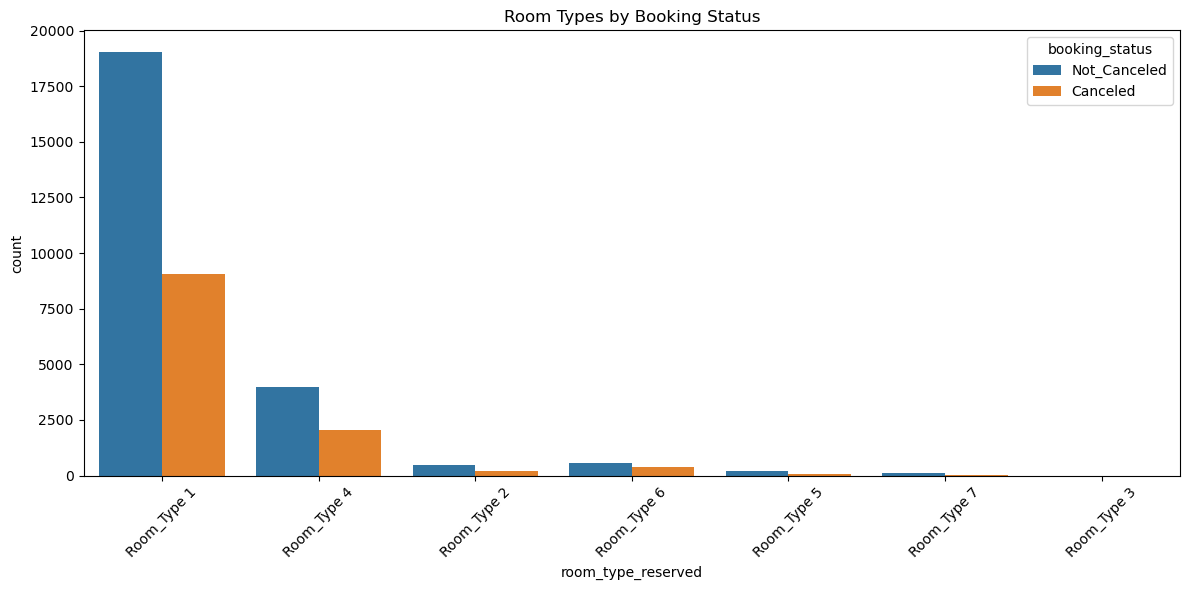

In [35]:
# Creating multiple visualizations to understand the data distribution

#Room Type and Booking Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Room Types by Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the distribution of room types by booking status, highlighting which room types are more likely to be canceled or not.

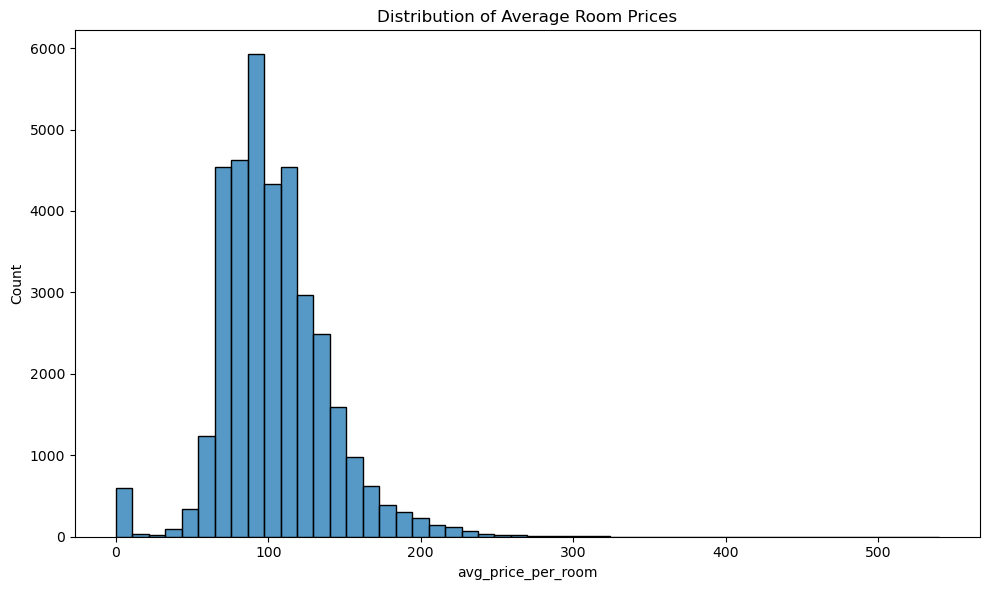

In [36]:
#Average Room Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_price_per_room', bins=50)
plt.title('Distribution of Average Room Prices')
plt.tight_layout()
plt.show()

This chart displays the distribution of average room prices, showing the spread and concentration of pricing.

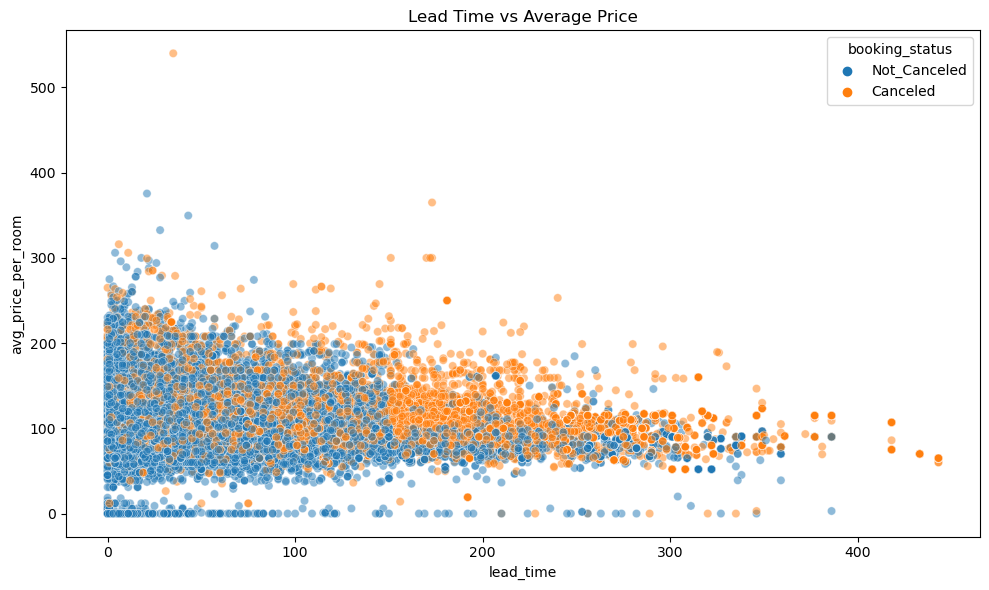

In [37]:
#Lead Time vs Price with Booking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', alpha=0.5)
plt.title('Lead Time vs Average Price')
plt.tight_layout()
plt.show()

This chart chart visualizes the relationship between lead time and average price, with booking status as a hue.

<Figure size 1200x600 with 0 Axes>

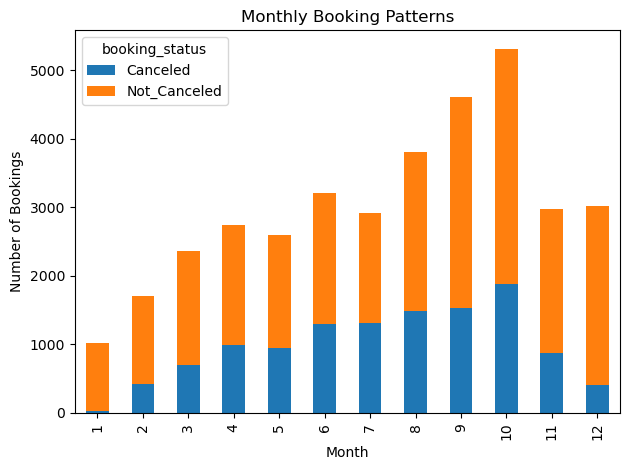

In [38]:
#Monthly Booking Patterns
plt.figure(figsize=(12, 6))
monthly_bookings = df.groupby(['arrival_month', 'booking_status']).size().unstack()
monthly_bookings.plot(kind='bar', stacked=True)
plt.title('Monthly Booking Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

This chart shows monthly booking patterns, with stacked bars for canceled and not canceled bookings.

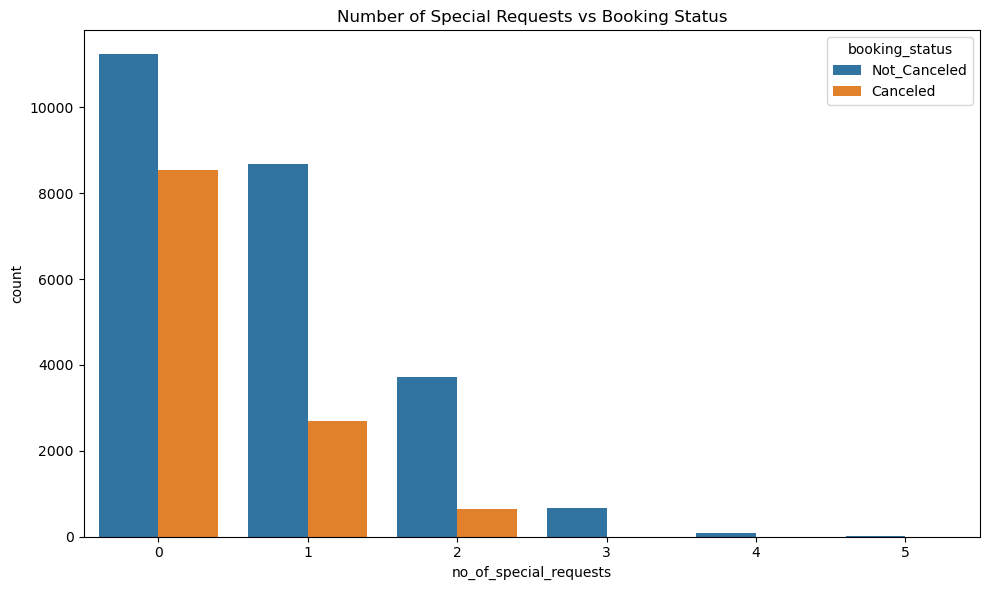

In [39]:
#Special Requests Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')
plt.title('Number of Special Requests vs Booking Status')
plt.tight_layout()
plt.show()

This chart highlights the number of special requests and their relationship with booking status.

### 5. CREATING MODELS

In [42]:
def skewness_heatmap(df, num_features, center_value=0):
    # Calculate skewness and prepare DataFrame
    skewness_df = pd.DataFrame(df[num_features].skew().sort_values(), columns=["Skewness"])
    
    skewness_df.head()